# Lab | Random Forests

For this lab, you will be using the CSV files provided in the `files_for_lab` folder.

## Read data

In [1]:
import pandas as pd

In [2]:
numerical = pd.read_csv('files_for_lab/numerical.csv')
categorical = pd.read_csv('files_for_lab/categorical.csv')
target = pd.read_csv('files_for_lab/target.csv')

## Explore data

Apply the Random Forests algorithm but this time only by upscaling the data.

In [14]:
categorical.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3


In [33]:
# Let's check categorical NaNs
import numpy as np

results = []

for col in categorical.columns:
    num_nans = categorical[col].isnull().sum()
    percent_nans = (num_nans / categorical.shape[0]) * 100
    results.append([col, num_nans, percent_nans])

result_df = pd.DataFrame(results, columns=["Column Name", "Number of NaNs", "Percentage of NaNs"])
result_df = result_df.sort_values(by="Percentage of NaNs", ascending=False)
result_df

,Column Name,Number of NaNs,Percentage of NaNs
0,STATE,0,0.0
1,CLUSTER,0,0.0
20,FIRSTDATE_YR,0,0.0
19,LASTDATE_MM,0,0.0
18,LASTDATE_YR,0,0.0
17,MAXRDATE_MM,0,0.0
16,MAXRDATE_YR,0,0.0
15,MINRDATE_MM,0,0.0
14,MINRDATE_YR,0,0.0
13,DOB_MM,0,0.0


## Feature Engineering

### Encoding for categorical

In [3]:
# No NaNs! We can go straight to encoding

from sklearn.preprocessing import OneHotEncoder 

encoder = OneHotEncoder(drop='first', sparse=False)
categorical = pd.DataFrame(encoder.fit_transform(categorical), columns=encoder.get_feature_names(categorical.columns))

# check the encoded df
categorical.head()

c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,...,FIRSTDATE_MM_3,FIRSTDATE_MM_4,FIRSTDATE_MM_5,FIRSTDATE_MM_6,FIRSTDATE_MM_7,FIRSTDATE_MM_8,FIRSTDATE_MM_9,FIRSTDATE_MM_10,FIRSTDATE_MM_11,FIRSTDATE_MM_12
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
numerical.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26


### Feature selection for numerical

In [36]:
# With 315 numerical columns, we should do some feature selection first.

# We'll discard the variance threshold method as it does not consider the target variable.
# SelectKBest we need to specify the number of features to select, which is not ideal. 
# RFE would be more suited. 

# With RandomForest, a feature selection is already applied implicitely. However with so many features, we'll still apply RFE 
# Also this will help with dimensionality reduction and also overfitting.

In [37]:
# First we'll need to deal with NaNs 

import numpy as np

results = []

for col in numerical.columns:
    num_nans = numerical[col].isnull().sum()
    percent_nans = (num_nans / numerical.shape[0]) * 100
    results.append([col, num_nans, percent_nans])

result_df = pd.DataFrame(results, columns=["Column Name", "Number of NaNs", "Percentage of NaNs"])
result_df = result_df.sort_values(by="Percentage of NaNs", ascending=False)
result_df


,Column Name,Number of NaNs,Percentage of NaNs
0,TCODE,0,0.0
207,EIC4,0,0.0
214,EIC11,0,0.0
213,EIC10,0,0.0
212,EIC9,0,0.0
...,...,...,...
104,ETHC1,0,0.0
103,HHD12,0,0.0
102,HHD11,0,0.0
101,HHD10,0,0.0


In [38]:
# No NaNs, that's ideal. 

In [4]:
# Now let's do feature selection using the SelectKBest method 

from sklearn.feature_selection import SelectKBest, chi2

kbest = SelectKBest(chi2, k=50)
kbest.fit(numerical, target['TARGET_B'])
selected_features = numerical.columns[kbest.get_support()]
numerical_selected = numerical[selected_features]

In [11]:
# We could have also checked with a Random Forest method 
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=50, step=10)
selector.fit(numerical, target['TARGET_B']) 
selected_features = numerical.columns[selector.support_]
numerical_selected = numerical[selected_features]

### Concatenating

In [5]:
# Now let's concat

X = pd.concat([numerical_selected, categorical], axis=1)

### Splitting Train test 

In [6]:
# Split data into train and test sets  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target['TARGET_B'], test_size=0.2, random_state=42)

In [43]:
target.head()

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [7]:
target['TARGET_B'].value_counts(dropna=False)

0    90569
1     4843
Name: TARGET_B, dtype: int64

### Imbalanced target

In [8]:
# We have imbalanced data, let's use SMOTE to upscale the data. 
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# after smote 
y_smote.value_counts(dropna=False)

0    72464
1    72464
Name: TARGET_B, dtype: int64

## Random Forest prediction

In [9]:
# Use a random forest classifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=6,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)

In [10]:
# Fitting the model
rf.fit(X_smote, y_smote)

RandomForestClassifier(max_depth=6, max_samples=0.8, min_samples_leaf=20,
                       min_samples_split=20, random_state=42)

In [11]:
# Predicting the test set results
y_pred = rf.predict(X_test)

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     18105
           1       0.07      0.05      0.06       978

    accuracy                           0.92     19083
   macro avg       0.51      0.51      0.51     19083
weighted avg       0.90      0.92      0.91     19083

Accuracy Score: 
 0.9168893779804014


c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


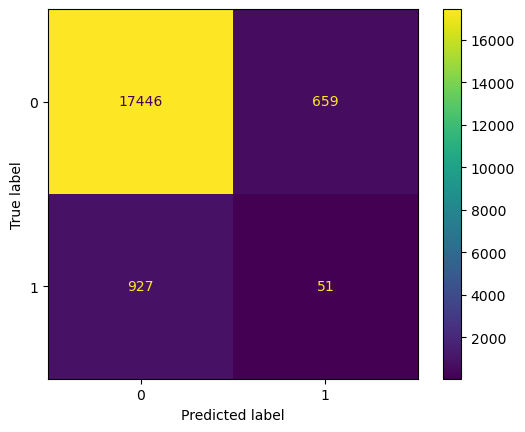

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Accuracy Score: \n', accuracy_score(y_test, y_pred))

# Plot the confusion matrix
plot_confusion_matrix(rf, X_test, y_test)
plt.show()

In [ ]:
# Model is performing well for class 0, but poorly for class 1. 

# Discussion
Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the bussiness?

In [ ]:
# False positives: 
# The model predicted that a customer would donate, but they did not or a customer would not donate, but they actually would have. 

In [ ]:
# Generally, it's often more costly to have a false negative (missing out on a potential donor) than a false positive (wasting resources on a non-donor).

### Fine tuning the model

Sklearn classification models are trained to maximize the accuracy. However, another error metric will be more relevant here. Which one? Please checkout make_scorer alongside with GridSearchCV in order to train the model to maximize the error metric of interest in this case.

In [12]:
# Let's use Randomiser Search to find the best hyperparameters (GridSearch took too long to run)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# Parameter grid
param_grid = {
    'n_estimators': [50, 100], 
    'max_depth': [None, 10], 
    'min_samples_split': [2, 5], 
    'min_samples_leaf': [1, 2] 
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_smote, y_smote)

print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [13]:
# Fit model with new parameters 

rf_best = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42)
rf_best.fit(X_smote, y_smote)
y_pred = rf_best.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Classification Report: ")
print(classification_report(y_test, y_pred))
print("Accuracy Score: ")
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18105
           1       0.00      0.00      0.00       978

    accuracy                           0.95     19083
   macro avg       0.47      0.50      0.49     19083
weighted avg       0.90      0.95      0.92     19083

Accuracy Score: 
0.9487501965099827
Confusion Matrix: 
[[18105     0]
 [  978     0]]


c:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# The model is good at predicting the majority class, but not the minority class. 

In [14]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

scorer = make_scorer(f1_score)
clf = RandomForestClassifier()

# Parameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, scoring=scorer, cv=5)
grid_search.fit(X_smote, y_smote)

print("Best parameters: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)
